In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

In [2]:
data = pd.read_csv('train_september.csv')
data.head()

,Route Name,Passengers In,Passengers Out,Actual Bus Occupancy,stop_sequence_normalized,daily_order_trip_normalized,Horizontal Direction,Vertical Direction,hour_sin,hour_cos,...,minute_cos,day_sin,day_cos,month_sin,month_cos,weekday_sin,weekday_cos,stop_lat_norm,stop_lon_norm,Overcrowded
0,0.159385,2,0,2,0.0,1.0,1,0,-1.000000,0.000000,...,-0.913545,0.205863,0.978581,-1.0,0.0,0.0,1.0,0.679239,0.191049,0
1,0.159385,1,3,0,0.5,1.0,1,0,-1.000000,0.000000,...,0.104528,0.205863,0.978581,-1.0,0.0,0.0,1.0,0.758647,0.202937,0
2,0.159385,2,3,0,1.0,1.0,1,0,-1.000000,0.000000,...,0.743145,0.205863,0.978581,-1.0,0.0,0.0,1.0,0.770613,0.227083,0
3,0.159385,4,9,0,0.0,0.2,-1,0,0.258819,-0.965926,...,-0.669131,0.205863,0.978581,-1.0,0.0,0.0,1.0,0.771116,0.226312,0
4,0.159385,3,3,0,0.5,0.2,-1,0,0.258819,-0.965926,...,-0.994522,0.205863,0.978581,-1.0,0.0,0.0,1.0,0.759909,0.201772,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170607 entries, 0 to 170606
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Route Name                   170607 non-null  float64
 1   Passengers In                170607 non-null  int64  
 2   Passengers Out               170607 non-null  int64  
 3   Actual Bus Occupancy         170607 non-null  int64  
 4   stop_sequence_normalized     170607 non-null  float64
 5   daily_order_trip_normalized  170607 non-null  float64
 6   Horizontal Direction         170607 non-null  int64  
 7   Vertical Direction           170607 non-null  int64  
 8   hour_sin                     170607 non-null  float64
 9   hour_cos                     170607 non-null  float64
 10  minute_sin                   170607 non-null  float64
 11  minute_cos                   170607 non-null  float64
 12  day_sin                      170607 non-null  float64
 13 

In [4]:
data['Route Name'].nunique()

17

In [5]:
data.columns

Index(['Route Name', 'Passengers In', 'Passengers Out', 'Actual Bus Occupancy',
       'stop_sequence_normalized', 'daily_order_trip_normalized',
       'Horizontal Direction', 'Vertical Direction', 'hour_sin', 'hour_cos',
       'minute_sin', 'minute_cos', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos', 'stop_lat_norm',
       'stop_lon_norm', 'Overcrowded'],
      dtype='object')

In [6]:
df = pd.read_csv('test_september.csv')
val = pd.read_csv('val_september.csv')

In [7]:
data = data.drop(['Passengers In', 'Passengers Out', 'Actual Bus Occupancy'], axis=1)
df = df.drop(['Passengers In', 'Passengers Out', 'Actual Bus Occupancy'], axis=1)
val = val.drop(['Passengers In', 'Passengers Out', 'Actual Bus Occupancy'], axis=1)

In [8]:
# Store models and evaluation reports
models = {}
val_reports = {}
test_reports = {}

# Identify feature columns (excluding Route Name and target variable)
feature_cols = [col for col in data.columns if col not in ['Route Name', 'Overcrowded']]

for route in data['Route Name'].unique():
    print(f"Training model for Route: {route}")

    # Split data for the specific route
    train_route = data[data['Route Name'] == route].copy()
    val_route = val[val['Route Name'] == route].copy()
    test_route = df[df['Route Name'] == route].copy()

    # Skip if validation or test set is empty
    if val_route.empty or test_route.empty:
        print(f"Skipping Route {route} due to insufficient data.")
        continue

    # Define features and target
    X_train, y_train = train_route[feature_cols], train_route['Overcrowded']
    X_val, y_val = val_route[feature_cols], val_route['Overcrowded']
    X_test, y_test = test_route[feature_cols], test_route['Overcrowded']

    # Ensure the training set is not empty
    if X_train.empty or y_train.empty:
        print(f"Skipping Route {route} due to missing training data.")
        continue

    # Train a classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Validate on validation set
    y_val_pred = model.predict(X_val)
    val_report = classification_report(y_val, y_val_pred, output_dict=True)

    # Test on test set
    y_test_pred = model.predict(X_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Store the trained model and reports
    models[route] = model
    val_reports[route] = val_report
    test_reports[route] = test_report

print("Training and evaluation complete for all routes!")


Training model for Route: 0.159385
Training model for Route: 0.0474467951645873
Training model for Route: 0.06525241778498
Training model for Route: 0.0085327294431674
Training model for Route: 0.310452990560855
Training model for Route: 0.138167666348175
Training model for Route: 0.1127916963570332
Training model for Route: 0.0336421437308868
Training model for Route: 0.054953878298665
Training model for Route: 0.1552305110873222
Training model for Route: 1e-06
Training model for Route: 0.0127237904975682
Training model for Route: 0.0
Training model for Route: 0.0457880615883306
Training model for Route: 7e-06
Training model for Route: 2e-06
Skipping Route 2e-06 due to insufficient data.
Training model for Route: 0.0036499872495446
Training and evaluation complete for all routes!


In [9]:
# Initialize an empty list to store the results
results = []

# Loop through each route and its corresponding reports
for route, val_report in val_reports.items():
    test_report = test_reports[route]

    # Function to safely extract metrics for each class
    def get_metrics(report, class_label):
        if class_label in report:
            return {
                'Precision': report[class_label]['precision'],
                'Recall': report[class_label]['recall'],
                'F1-Score': report[class_label]['f1-score'],
            }
        else:
            return {
                'Precision': None,
                'Recall': None,
                'F1-Score': None,
            }

    # Extract metrics for class 0 and class 1 in the validation set
    val_class_0_metrics = get_metrics(val_report, '0')
    val_class_1_metrics = get_metrics(val_report, '1')

    # Calculate overall metrics for validation set (average across both classes)
    val_precision_avg = (val_class_0_metrics['Precision'] + val_class_1_metrics['Precision']) / 2 if val_class_0_metrics['Precision'] and val_class_1_metrics['Precision'] else None
    val_recall_avg = (val_class_0_metrics['Recall'] + val_class_1_metrics['Recall']) / 2 if val_class_0_metrics['Recall'] and val_class_1_metrics['Recall'] else None
    val_f1_avg = (val_class_0_metrics['F1-Score'] + val_class_1_metrics['F1-Score']) / 2 if val_class_0_metrics['F1-Score'] and val_class_1_metrics['F1-Score'] else None

    # Extract metrics for class 0 and class 1 in the test set
    test_class_0_metrics = get_metrics(test_report, '0')
    test_class_1_metrics = get_metrics(test_report, '1')

    # Calculate overall metrics for test set (average across both classes)
    test_precision_avg = (test_class_0_metrics['Precision'] + test_class_1_metrics['Precision']) / 2 if test_class_0_metrics['Precision'] and test_class_1_metrics['Precision'] else None
    test_recall_avg = (test_class_0_metrics['Recall'] + test_class_1_metrics['Recall']) / 2 if test_class_0_metrics['Recall'] and test_class_1_metrics['Recall'] else None
    test_f1_avg = (test_class_0_metrics['F1-Score'] + test_class_1_metrics['F1-Score']) / 2 if test_class_0_metrics['F1-Score'] and test_class_1_metrics['F1-Score'] else None

    # Combine all metrics into the final dictionaries for both validation and test sets
    val_metrics = {
        'Route Name': route,
        'Dataset': 'Validation',
        'Accuracy': val_report['accuracy'],
        'Avg Precision': val_precision_avg,
        'Avg Recall': val_recall_avg,
        'Avg F1-Score': val_f1_avg,
    }

    test_metrics = {
        'Route Name': route,
        'Dataset': 'Test',
        'Accuracy': test_report['accuracy'],
        'Avg Precision': test_precision_avg,
        'Avg Recall': test_recall_avg,
        'Avg F1-Score': test_f1_avg,
    }

    # Append the metrics to the results list
    results.append(val_metrics)
    results.append(test_metrics)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Route Name,Dataset,Accuracy,Avg Precision,Avg Recall,Avg F1-Score
0,0.159385,Validation,0.928571,0.822695,0.897959,0.854167
1,0.159385,Test,0.913580,0.792986,0.864789,0.822646
2,0.047447,Validation,0.936007,0.671772,0.540865,0.557241
3,0.047447,Test,0.992798,0.896936,0.709966,0.774047
4,0.065252,Validation,0.933639,0.727407,0.609473,0.643322
5,0.065252,Test,0.942580,0.704111,0.623164,0.651666
6,0.008533,Validation,0.993299,NaN,NaN,NaN
7,0.008533,Test,0.998005,NaN,NaN,NaN
8,0.310453,Validation,0.786550,0.761672,0.751913,0.756220
9,0.310453,Test,0.767534,0.693374,0.675489,0.682897


In [10]:
# Initialize a list to store the class metrics for the test dataset
class_metrics_test = []

# Loop through the results DataFrame to extract the test dataset metrics
for idx, row in results_df.iterrows():
    if row['Dataset'] == 'Test':  # Filter only the rows for the test dataset
        route = row['Route Name']
        
        # Function to safely extract metrics for each class
        def get_metrics(report, class_label):
            if class_label in report:
                return {
                    'Precision': report[class_label]['precision'],
                    'Recall': report[class_label]['recall'],
                    'F1-Score': report[class_label]['f1-score'],
                }
            else:
                return {
                    'Precision': None,
                    'Recall': None,
                    'F1-Score': None,
                }

        # Extract metrics for class 0 and class 1 from the test report
        test_class_0_metrics = get_metrics(test_reports[route], '0')
        test_class_1_metrics = get_metrics(test_reports[route], '1')

        # Append the results to the class_metrics_test list
        class_metrics_test.append({
            'Route Name': route,
            'Class 0 Precision': test_class_0_metrics['Precision'],
            'Class 0 Recall': test_class_0_metrics['Recall'],
            'Class 0 F1-Score': test_class_0_metrics['F1-Score'],
            'Class 1 Precision': test_class_1_metrics['Precision'],
            'Class 1 Recall': test_class_1_metrics['Recall'],
            'Class 1 F1-Score': test_class_1_metrics['F1-Score']
        })

# Convert the results list into a DataFrame
class_metrics_test_df = pd.DataFrame(class_metrics_test)

# Display the results
class_metrics_test_df


,Route Name,Class 0 Precision,Class 0 Recall,Class 0 F1-Score,Class 1 Precision,Class 1 Recall,Class 1 F1-Score
0,0.159385,0.970588,0.929577,0.949640,0.615385,0.800000,0.695652
1,0.047447,0.993872,0.998880,0.996370,0.800000,0.421053,0.551724
2,0.065252,0.958855,0.981402,0.969998,0.449367,0.264925,0.333333
3,0.008533,0.998005,1.000000,0.999001,0.000000,0.000000,0.000000
4,0.310453,0.827972,0.866341,0.846722,0.558776,0.484637,0.519073
5,0.138168,0.869565,0.971524,0.917722,0.666667,0.280992,0.395349
6,0.112792,0.893203,0.966058,0.928203,0.588618,0.295993,0.393906
7,0.033642,1.000000,1.000000,1.000000,NaN,NaN,NaN
8,0.054954,0.808847,1.000000,0.894323,0.000000,0.000000,0.000000
9,0.155231,0.897106,0.960964,0.927938,0.370370,0.172414,0.235294


In [11]:
results_df['Route Name'] = results_df['Route Name'].round(6)
results_df['Route Name']
class_metrics_test_df['Route Name'] = class_metrics_test_df['Route Name'].round(6)
class_metrics_test_df['Route Name']

0     0.159385
1     0.047447
2     0.065252
3     0.008533
4     0.310453
5     0.138168
6     0.112792
7     0.033642
8     0.054954
9     0.155231
10    0.000001
11    0.012724
12    0.000000
13    0.045788
14    0.000007
15    0.003650
Name: Route Name, dtype: float64

In [12]:
# Create a mapping dictionary from the provided route names and values
route_mapping = {
    0.012724: '10',
    0.310453: '115',
    0.000007: '14',
    0.138168: '1A',
    0.112792: '1C',
    0.065252: '2',
    0.000001: '25',
    0.047447: '3',
    0.008533: '4',
    0.003650: '418',
    0.000000: '42',
    0.159385: '518',
    0.155231: '6',
    0.000002: '605',
    0.045788: '7',
    0.054954: '8',
    0.033642: 'TUNNEL'
}

# Map the numerical values to the route names
results_df['Route Name'] = results_df['Route Name'].map(route_mapping)
class_metrics_test_df['Route Name'] = class_metrics_test_df['Route Name'].map(route_mapping)

In [13]:
class_metrics_test_df

,Route Name,Class 0 Precision,Class 0 Recall,Class 0 F1-Score,Class 1 Precision,Class 1 Recall,Class 1 F1-Score
0,518,0.970588,0.929577,0.949640,0.615385,0.800000,0.695652
1,3,0.993872,0.998880,0.996370,0.800000,0.421053,0.551724
2,2,0.958855,0.981402,0.969998,0.449367,0.264925,0.333333
3,4,0.998005,1.000000,0.999001,0.000000,0.000000,0.000000
4,115,0.827972,0.866341,0.846722,0.558776,0.484637,0.519073
5,1A,0.869565,0.971524,0.917722,0.666667,0.280992,0.395349
6,1C,0.893203,0.966058,0.928203,0.588618,0.295993,0.393906
7,TUNNEL,1.000000,1.000000,1.000000,NaN,NaN,NaN
8,8,0.808847,1.000000,0.894323,0.000000,0.000000,0.000000
9,6,0.897106,0.960964,0.927938,0.370370,0.172414,0.235294


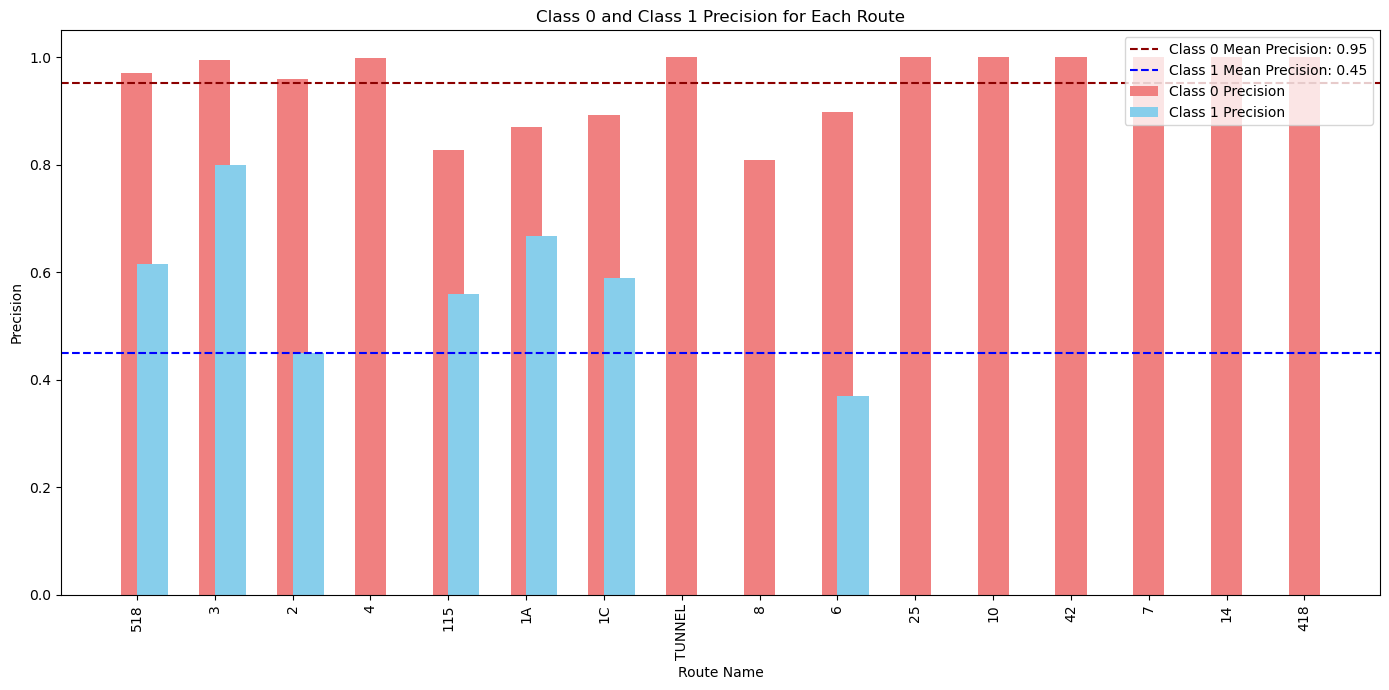

In [14]:
# Compute the mean precision for Class 0 and Class 1
class_0_mean_precision = class_metrics_test_df['Class 0 Precision'].mean()
class_1_mean_precision = class_metrics_test_df['Class 1 Precision'].mean()

# Create a bar plot for both Class 0 and Class 1 Precision for each Route
plt.figure(figsize=(14, 7))

# Bar plot for Class 0 Precision
plt.bar(class_metrics_test_df['Route Name'], 
        class_metrics_test_df['Class 0 Precision'], 
        width=0.4, label='Class 0 Precision', 
        color='lightcoral', align='center')

# Bar plot for Class 1 Precision
plt.bar(class_metrics_test_df['Route Name'], 
        class_metrics_test_df['Class 1 Precision'], 
        width=0.4, label='Class 1 Precision', 
        color='skyblue', align='edge')

# Add horizontal lines for the mean precision values
plt.axhline(y=class_0_mean_precision, color='darkred', linestyle='--', 
            label=f'Class 0 Mean Precision: {class_0_mean_precision:.2f}')
plt.axhline(y=class_1_mean_precision, color='blue', linestyle='--', 
            label=f'Class 1 Mean Precision: {class_1_mean_precision:.2f}')

# Add labels and title
plt.xlabel('Route Name')
plt.ylabel('Precision')
plt.title('Class 0 and Class 1 Precision for Each Route')

# Rotate route names for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(loc='upper right')

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


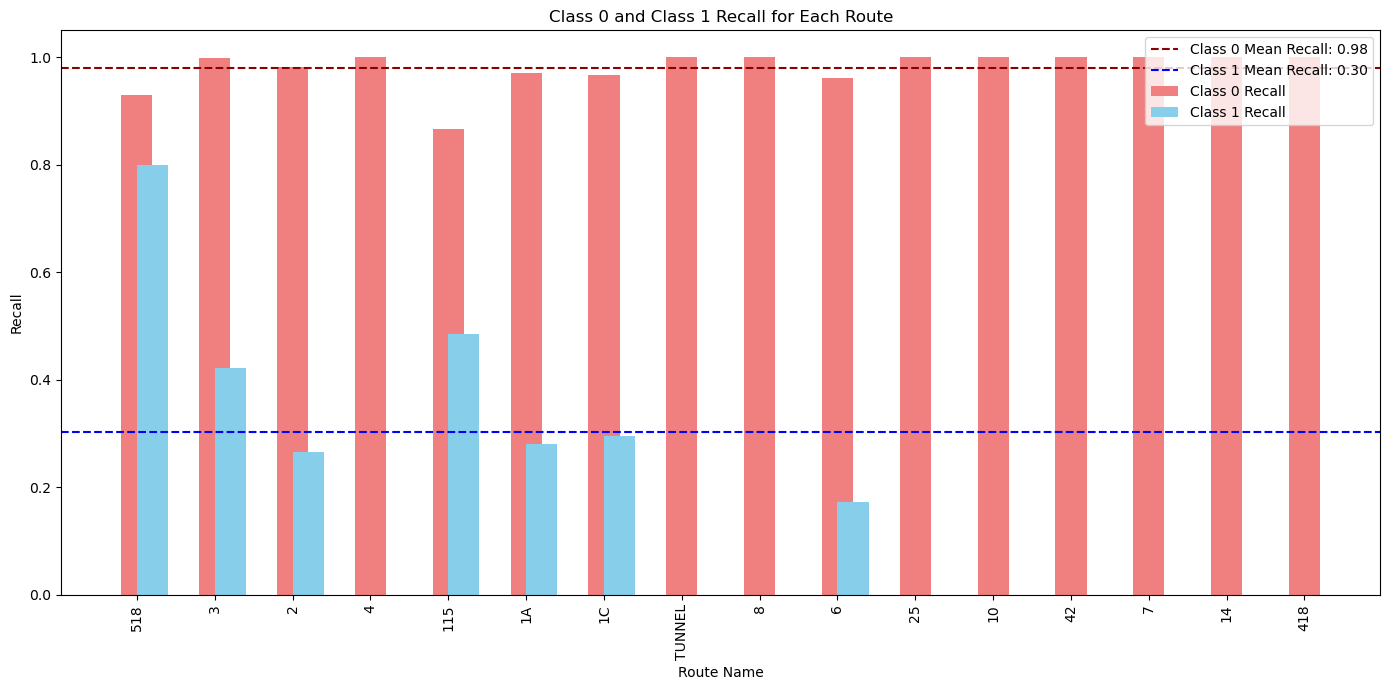

In [16]:
# Compute the mean recall for Class 0 and Class 1
class_0_mean_recall = class_metrics_test_df['Class 0 Recall'].mean()
class_1_mean_recall = class_metrics_test_df['Class 1 Recall'].mean()

# Create a bar plot for both Class 0 and Class 1 Recall for each Route
plt.figure(figsize=(14, 7))

# Bar plot for Class 0 Recall
plt.bar(class_metrics_test_df['Route Name'],
        class_metrics_test_df['Class 0 Recall'],
        width=0.4, label='Class 0 Recall', color='lightcoral', align='center')

# Bar plot for Class 1 Recall
plt.bar(class_metrics_test_df['Route Name'],
        class_metrics_test_df['Class 1 Recall'],
        width=0.4, label='Class 1 Recall', color='skyblue', align='edge')

# Add horizontal lines for the average recall values
plt.axhline(y=class_0_mean_recall, color='darkred', linestyle='--',
            label=f'Class 0 Mean Recall: {class_0_mean_recall:.2f}')
plt.axhline(y=class_1_mean_recall, color='blue', linestyle='--',
            label=f'Class 1 Mean Recall: {class_1_mean_recall:.2f}')

# Add labels and title
plt.xlabel('Route Name')
plt.ylabel('Recall')
plt.title('Class 0 and Class 1 Recall for Each Route')

# Rotate route names for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [15]:
# Filter for only the test dataset
test_results_df = results_df[results_df['Dataset'] == 'Test']

# Convert metrics to numeric values (ignoring NaNs)
test_results_df = test_results_df.apply(pd.to_numeric, errors='ignore')

# Calculate the overall averages for the test dataset
overall_accuracy = test_results_df['Accuracy'].mean()

overall_precision = test_results_df['Avg Precision'].mean()
overall_recall = test_results_df['Avg Recall'].mean()
overall_f1_score = test_results_df['Avg F1-Score'].mean()

# Print the overall results for the test dataset
print(f"\nTest Accuracy: {overall_accuracy:.2%}")
print(f"Test Average Precision: {overall_precision:.2%}")
print(f"Test Average Recall: {overall_recall:.2%}")
print(f"Test Average F1-score: {overall_f1_score:.2%}")



Test Accuracy: 93.86%
Test Average Precision: 74.72%
Test Average Recall: 67.11%
Test Average F1-score: 69.01%


Skipping Route TUNNEL: No positive class (1) in test set.
Skipping Route 25: No positive class (1) in test set.
Skipping Route 10: No positive class (1) in test set.
Skipping Route 42: No positive class (1) in test set.
Skipping Route 7: No positive class (1) in test set.
Skipping Route 14: No positive class (1) in test set.
Skipping Route 418: No positive class (1) in test set.


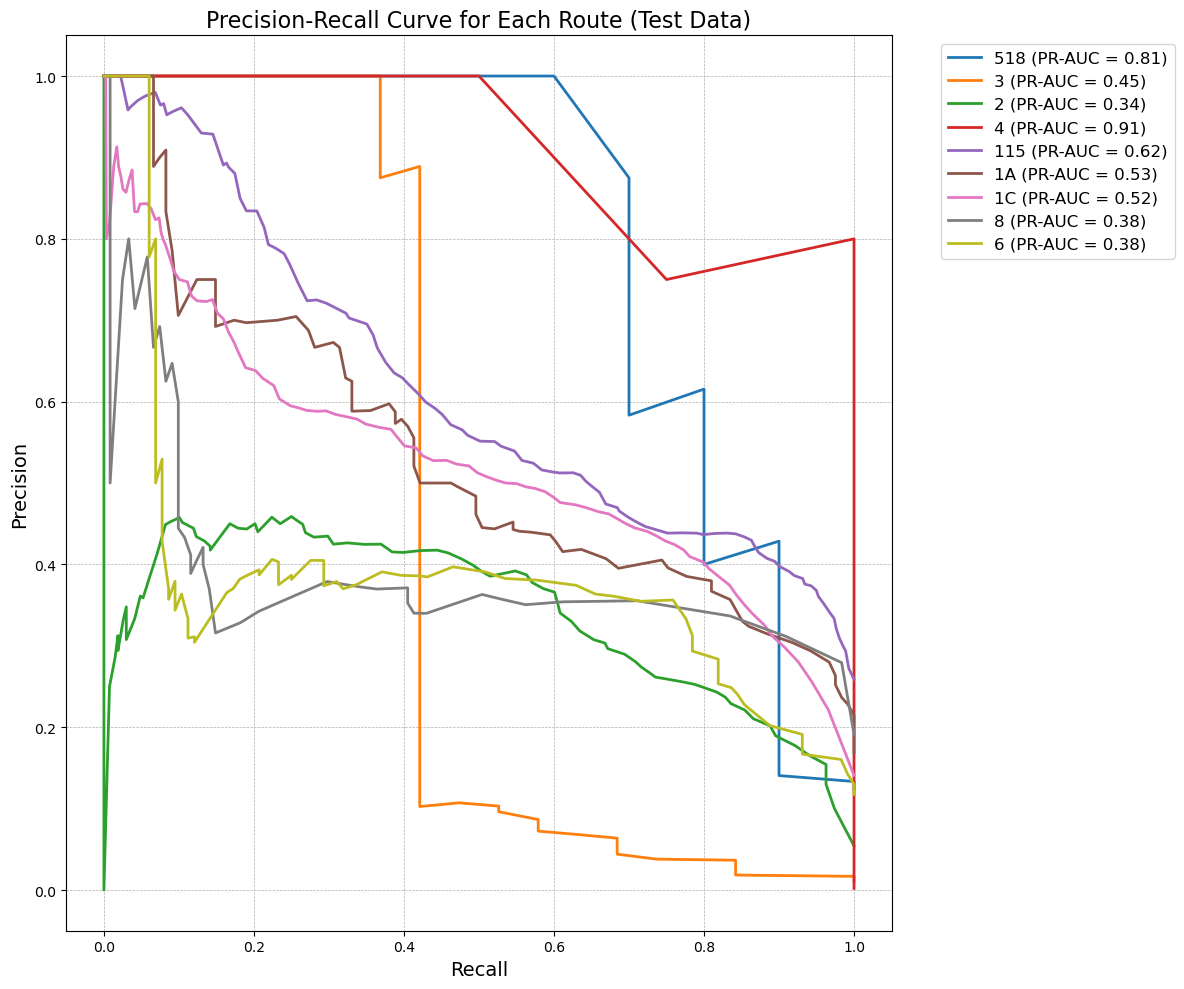

In [16]:
# Create a figure for the PR curves
plt.figure(figsize=(12, 10))

# Loop through each route and its corresponding model
for route, model in models.items():
    # Map the route value to its name
    route_name = route_mapping.get(round(route, 6), f'Unknown ({route})')

    # Get the test data for the route
    test_route = df[df['Route Name'] == route]
    X_test = test_route[feature_cols]
    y_test = test_route['Overcrowded']

    # Check if the positive class (1) exists in the test set
    if 1 not in y_test.unique():
        print(f"Skipping Route {route_name}: No positive class (1) in test set.")
        continue

    # Get predicted probabilities for the positive class (1)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

    # Compute PR-AUC
    pr_auc = auc(recall, precision)

    # Plot the PR curve for the route with its name
    plt.plot(recall, precision, lw=2, label=f'{route_name} (PR-AUC = {pr_auc:.2f})')

# Add labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve for Each Route (Test Data)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Skipping Route TUNNEL: Not enough classes in test set.
Skipping Route 25: Not enough classes in test set.
Skipping Route 10: Not enough classes in test set.
Skipping Route 42: Not enough classes in test set.
Skipping Route 7: Not enough classes in test set.
Skipping Route 14: Not enough classes in test set.
Skipping Route 418: Not enough classes in test set.


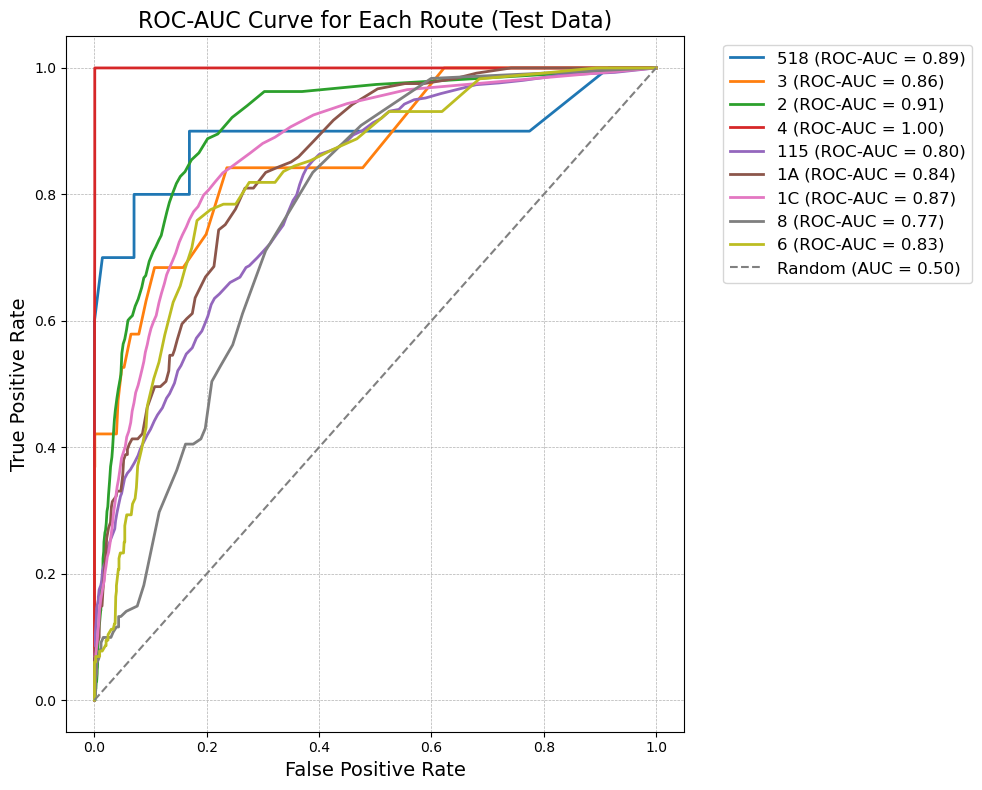

In [17]:
# Create a figure for the ROC curves
plt.figure(figsize=(10, 8))

# Loop through each route and its corresponding model
for route, model in models.items():
    # Map the route value to its name
    route_name = route_mapping.get(round(route, 6), f'Unknown ({route})')

    # Get the test data for the route
    test_route = df[df['Route Name'] == route]
    X_test = test_route[feature_cols]
    y_test = test_route['Overcrowded']

    # Check if both classes (0 and 1) exist in the test set
    if len(y_test.unique()) < 2:
        print(f"Skipping Route {route_name}: Not enough classes in test set.")
        continue

    # Get predicted probabilities for the positive class (1)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)

    # Compute ROC-AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the route with its name
    plt.plot(fpr, tpr, lw=2, label=f'{route_name} (ROC-AUC = {roc_auc:.2f})')

# Plot the random classifier line (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-AUC Curve for Each Route (Test Data)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


#### Fine tuning the model

In [18]:
# Define a hyperparameter search space for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5],       
    'min_samples_leaf': [1, 2],       
    'max_features': ['auto', 'sqrt'],  
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Use RandomizedSearchCV 
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Use 3-fold cross-validation 
    n_jobs=-1,  # Use all cores to speed up the search
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

# Run the search for each route
for route in data['Route Name'].unique():
    print(f"Training model for Route: {route}")

    # Split data for the specific route
    train_route = data[data['Route Name'] == route].copy()
    val_route = val[val['Route Name'] == route].copy()
    test_route = df[df['Route Name'] == route].copy()

    # Skip if validation or test set is empty
    if val_route.empty or test_route.empty:
        print(f"Skipping Route {route} due to insufficient data.")
        continue

    # Define features and target
    X_train, y_train = train_route[feature_cols], train_route['Overcrowded']
    X_val, y_val = val_route[feature_cols], val_route['Overcrowded']
    X_test, y_test = test_route[feature_cols], test_route['Overcrowded']

    # Ensure the training set is not empty
    if X_train.empty or y_train.empty:
        print(f"Skipping Route {route} due to missing training data.")
        continue

    # Perform the RandomizedSearchCV fitting
    random_search.fit(X_train, y_train)

    # Best model
    best_model = random_search.best_estimator_

    # Validate on validation set
    y_val_pred = best_model.predict(X_val)
    val_report = classification_report(y_val, y_val_pred, output_dict=True)

    # Test on test set
    y_test_pred = best_model.predict(X_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Store the trained model and reports
    models[route] = best_model
    val_reports[route] = val_report
    test_reports[route] = test_report

print("Training and evaluation complete for all routes!")

Training model for Route: 0.159385
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.0474467951645873
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.06525241778498
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.0085327294431674
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.310452990560855
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.138167666348175
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.1127916963570332
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.0336421437308868
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.054953878298665
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training model for Route: 0.1552305110873222
Fitting 3 folds 

In [19]:
# Display the best parameters
print(f"Best Parameters {best_model}")

Best Parameters RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


In [20]:
# Initialize an empty list to store the results
results = []

# Loop through each route and its corresponding reports
for route, val_report in val_reports.items():
    test_report = test_reports[route]

    # Function to safely extract overall metrics
    def get_overall_metrics(report):
        return {
            'Precision (Overall)': report['weighted avg']['precision'],
            'Recall (Overall)': report['weighted avg']['recall'],
            'F1-Score (Overall)': report['weighted avg']['f1-score'],
            'Accuracy': report['accuracy']
        }

    # Extract overall metrics for validation set
    val_metrics = {
        'Route Name': route,
        'Dataset': 'Validation',
        **get_overall_metrics(val_report),  # Overall metrics for validation
    }

    # Extract overall metrics for test set
    test_metrics = {
        'Route Name': route,
        'Dataset': 'Test',
        **get_overall_metrics(test_report),  # Overall metrics for test
    }

    # Append the metrics to the results list
    results.append(val_metrics)
    results.append(test_metrics)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Route Name,Dataset,Precision (Overall),Recall (Overall),F1-Score (Overall),Accuracy
0,0.159385,Validation,0.943053,0.934524,0.937440,0.934524
1,0.159385,Test,0.941286,0.938272,0.939522,0.938272
2,0.047447,Validation,0.914704,0.938567,0.916364,0.938567
3,0.047447,Test,0.992077,0.992798,0.991342,0.992798
4,0.065252,Validation,0.891645,0.932703,0.901401,0.932703
5,0.065252,Test,0.894545,0.945410,0.919275,0.945410
6,0.008533,Validation,0.991949,0.989547,0.990747,0.989547
7,0.008533,Test,0.996014,0.998005,0.997008,0.998005
8,0.310453,Validation,0.779223,0.784572,0.779398,0.784572
9,0.310453,Test,0.758844,0.776573,0.761130,0.776573


In [22]:
# Initialize a list to store the class metrics for the test dataset
fn_class_metrics_test = []

# Loop through the results DataFrame to extract the test dataset metrics
for idx, row in results_df.iterrows():
    if row['Dataset'] == 'Test':  # Filter only the rows for the test dataset
        route = row['Route Name']
        
        # Function to safely extract metrics for each class
        def get_metrics(report, class_label):
            if class_label in report:
                return {
                    'Precision': report[class_label]['precision'],
                    'Recall': report[class_label]['recall'],
                    'F1-Score': report[class_label]['f1-score'],
                }
            else:
                return {
                    'Precision': None,
                    'Recall': None,
                    'F1-Score': None,
                }

        # Extract metrics for class 0 and class 1 from the test report
        test_class_0_metrics = get_metrics(test_reports[route], '0')
        test_class_1_metrics = get_metrics(test_reports[route], '1')

        # Append the results to the class_metrics_test list
        fn_class_metrics_test.append({
            'Route Name': route,
            'Class 0 Precision': test_class_0_metrics['Precision'],
            'Class 0 Recall': test_class_0_metrics['Recall'],
            'Class 0 F1-Score': test_class_0_metrics['F1-Score'],
            'Class 1 Precision': test_class_1_metrics['Precision'],
            'Class 1 Recall': test_class_1_metrics['Recall'],
            'Class 1 F1-Score': test_class_1_metrics['F1-Score']
        })

# Convert the results list into a DataFrame
fn_class_metrics_test_df = pd.DataFrame(fn_class_metrics_test)

# Display the results
fn_class_metrics_test_df


,Route Name,Class 0 Precision,Class 0 Recall,Class 0 F1-Score,Class 1 Precision,Class 1 Recall,Class 1 F1-Score
0,0.159385,0.971429,0.957746,0.964539,0.727273,0.800000,0.761905
1,0.047447,0.993322,0.999440,0.996372,0.875000,0.368421,0.518519
2,0.065252,0.945793,0.999572,0.971939,0.000000,0.000000,0.000000
3,0.008533,0.998005,1.000000,0.999001,0.000000,0.000000,0.000000
4,0.310453,0.814035,0.905366,0.857275,0.600823,0.407821,0.485857
5,0.138168,0.843750,0.994975,0.913144,0.785714,0.090909,0.162963
6,0.112792,0.867292,0.992487,0.925676,0.619048,0.074407,0.132847
7,0.033642,1.000000,1.000000,1.000000,NaN,NaN,NaN
8,0.054954,0.808847,1.000000,0.894323,0.000000,0.000000,0.000000
9,0.155231,0.896480,0.994259,0.942842,0.761905,0.137931,0.233577


In [23]:
# results_df['Route Name'] = results_df['Route Name'].round(6)
fn_class_metrics_test_df['Route Name'] = fn_class_metrics_test_df['Route Name'].round(6)

# Create a mapping dictionary from the provided route names and values
route_mapping = {
    0.012724: '10',
    0.310453: '115',
    0.000007: '14',
    0.138168: '1A',
    0.112792: '1C',
    0.065252: '2',
    0.000001: '25',
    0.047447: '3',
    0.008533: '4',
    0.003650: '418',
    0.000000: '42',
    0.159385: '518',
    0.155231: '6',
    0.000002: '605',
    0.045788: '7',
    0.054954: '8',
    0.033642: 'TUNNEL'
}

# Map the numerical values to the route names
# results_df['Route Name'] = results_df['Route Name'].map(route_mapping)
fn_class_metrics_test_df['Route Name'] = fn_class_metrics_test_df['Route Name'].map(route_mapping)

In [24]:
fn_class_metrics_test_df

,Route Name,Class 0 Precision,Class 0 Recall,Class 0 F1-Score,Class 1 Precision,Class 1 Recall,Class 1 F1-Score
0,518,0.971429,0.957746,0.964539,0.727273,0.800000,0.761905
1,3,0.993322,0.999440,0.996372,0.875000,0.368421,0.518519
2,2,0.945793,0.999572,0.971939,0.000000,0.000000,0.000000
3,4,0.998005,1.000000,0.999001,0.000000,0.000000,0.000000
4,115,0.814035,0.905366,0.857275,0.600823,0.407821,0.485857
5,1A,0.843750,0.994975,0.913144,0.785714,0.090909,0.162963
6,1C,0.867292,0.992487,0.925676,0.619048,0.074407,0.132847
7,TUNNEL,1.000000,1.000000,1.000000,NaN,NaN,NaN
8,8,0.808847,1.000000,0.894323,0.000000,0.000000,0.000000
9,6,0.896480,0.994259,0.942842,0.761905,0.137931,0.233577


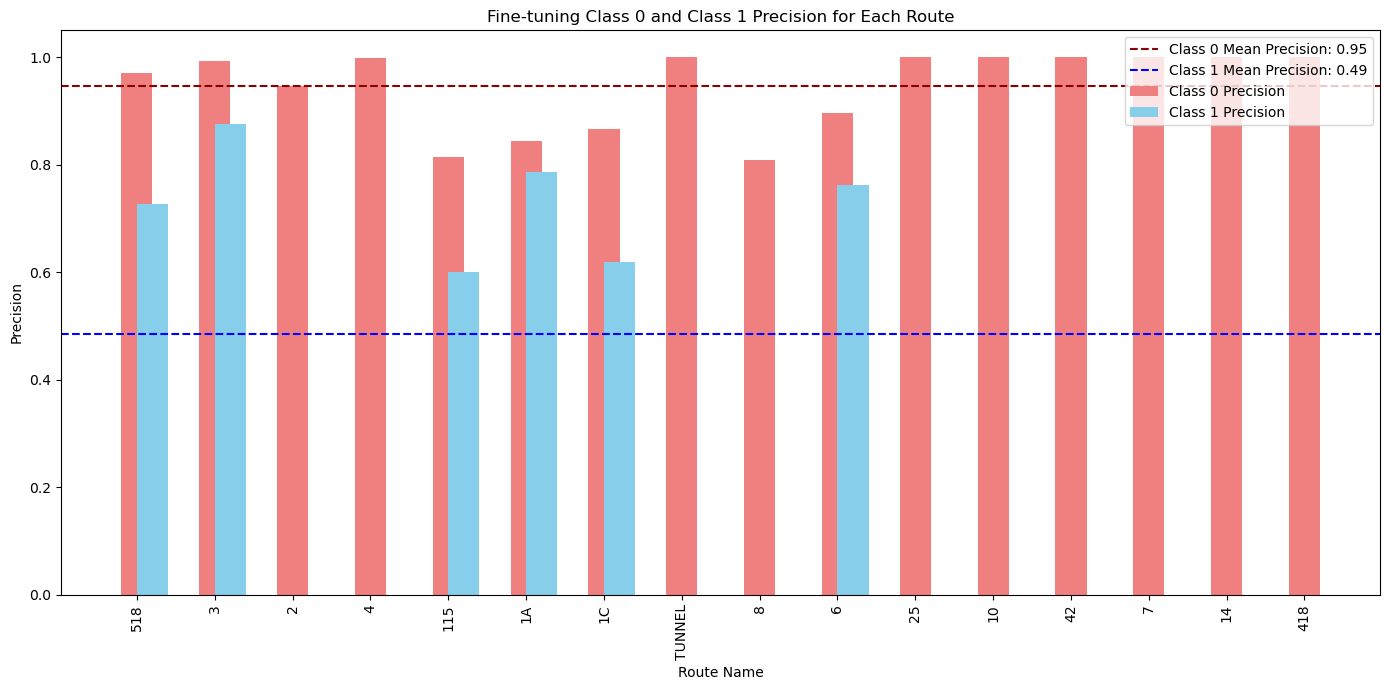

In [25]:
# Compute the mean precision for Class 0 and Class 1
fn_class_0_mean_precision = fn_class_metrics_test_df['Class 0 Precision'].mean()
fn_class_1_mean_precision = fn_class_metrics_test_df['Class 1 Precision'].mean()

# Create a bar plot for both Class 0 and Class 1 Precision for each Route
plt.figure(figsize=(14, 7))

# Bar plot for Class 0 Precision
plt.bar(fn_class_metrics_test_df['Route Name'],
        fn_class_metrics_test_df['Class 0 Precision'],
        width=0.4, label='Class 0 Precision', color='lightcoral', align='center')

# Bar plot for Class 1 Precision
plt.bar(fn_class_metrics_test_df['Route Name'],
        fn_class_metrics_test_df['Class 1 Precision'],
        width=0.4, label='Class 1 Precision', color='skyblue', align='edge')

# Add horizontal lines for the mean precision values
plt.axhline(y=fn_class_0_mean_precision, color='darkred', linestyle='--',
            label=f'Class 0 Mean Precision: {fn_class_0_mean_precision:.2f}')
plt.axhline(y=fn_class_1_mean_precision, color='blue', linestyle='--',
            label=f'Class 1 Mean Precision: {fn_class_1_mean_precision:.2f}')

# Add labels and title
plt.xlabel('Route Name')
plt.ylabel('Precision')
plt.title('Fine-tuning Class 0 and Class 1 Precision for Each Route')

# Rotate route names for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


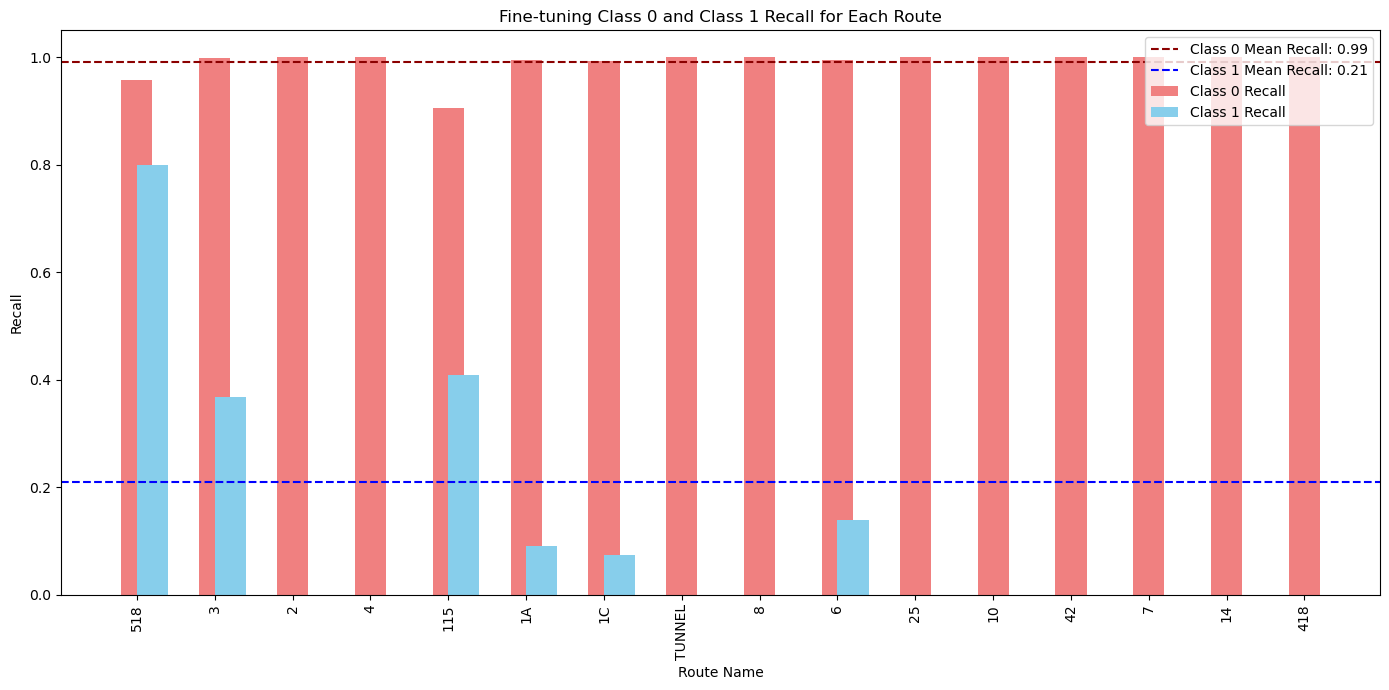

In [26]:
# Compute the mean recall for Class 0 and Class 1
fn_class_0_mean_recall = fn_class_metrics_test_df['Class 0 Recall'].mean()
fn_class_1_mean_recall = fn_class_metrics_test_df['Class 1 Recall'].mean()

# Create a bar plot for both Class 0 and Class 1 Recall for each Route
plt.figure(figsize=(14, 7))

# Bar plot for Class 0 recall
plt.bar(fn_class_metrics_test_df['Route Name'],
        fn_class_metrics_test_df['Class 0 Recall'],
        width=0.4, label='Class 0 Recall', color='lightcoral', align='center')

# Bar plot for Class 1 recall
plt.bar(fn_class_metrics_test_df['Route Name'],
        fn_class_metrics_test_df['Class 1 Recall'],
        width=0.4, label='Class 1 Recall', color='skyblue', align='edge')

# Add horizontal lines for the average recall values
plt.axhline(y=fn_class_0_mean_recall, color='darkred', linestyle='--',
            label=f'Class 0 Mean Recall: {fn_class_0_mean_recall:.2f}')
plt.axhline(y=fn_class_1_mean_recall, color='blue', linestyle='--',
            label=f'Class 1 Mean Recall: {fn_class_1_mean_recall:.2f}')

# Add labels and title
plt.xlabel('Route Name')
plt.ylabel('Recall')
plt.title('Fine-tuning Class 0 and Class 1 Recall for Each Route')

# Rotate route names for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [27]:
# Filter for only the test dataset
test_results_df = results_df[results_df['Dataset'] == 'Test']

# Convert metrics to numeric values (ignoring NaNs)
test_results_df = test_results_df.apply(pd.to_numeric, errors='ignore')

# Calculate the overall averages across the test dataset
overall_accuracy = test_results_df['Accuracy'].mean()

overall_precision = test_results_df['Precision (Overall)'].mean()

overall_recall = test_results_df['Recall (Overall)'].mean()

overall_f1_score = test_results_df['F1-Score (Overall)'].mean()

# Print the overall metrics
print(f"\nTest Accuracy: {overall_accuracy:.2%}")
print(f"Precision (Overall): {overall_precision:.2%}")
print(f"Recall (Overall): {overall_recall:.2%}")
print(f"F1-score (Overall): {overall_f1_score:.2%}")



Test Accuracy: 94.12%
Precision (Overall): 92.40%
Recall (Overall): 94.12%
F1-score (Overall): 92.45%


Skipping Route TUNNEL: No positive class (1) in test set.
Skipping Route 25: No positive class (1) in test set.
Skipping Route 10: No positive class (1) in test set.
Skipping Route 42: No positive class (1) in test set.
Skipping Route 7: No positive class (1) in test set.
Skipping Route 14: No positive class (1) in test set.
Skipping Route 418: No positive class (1) in test set.


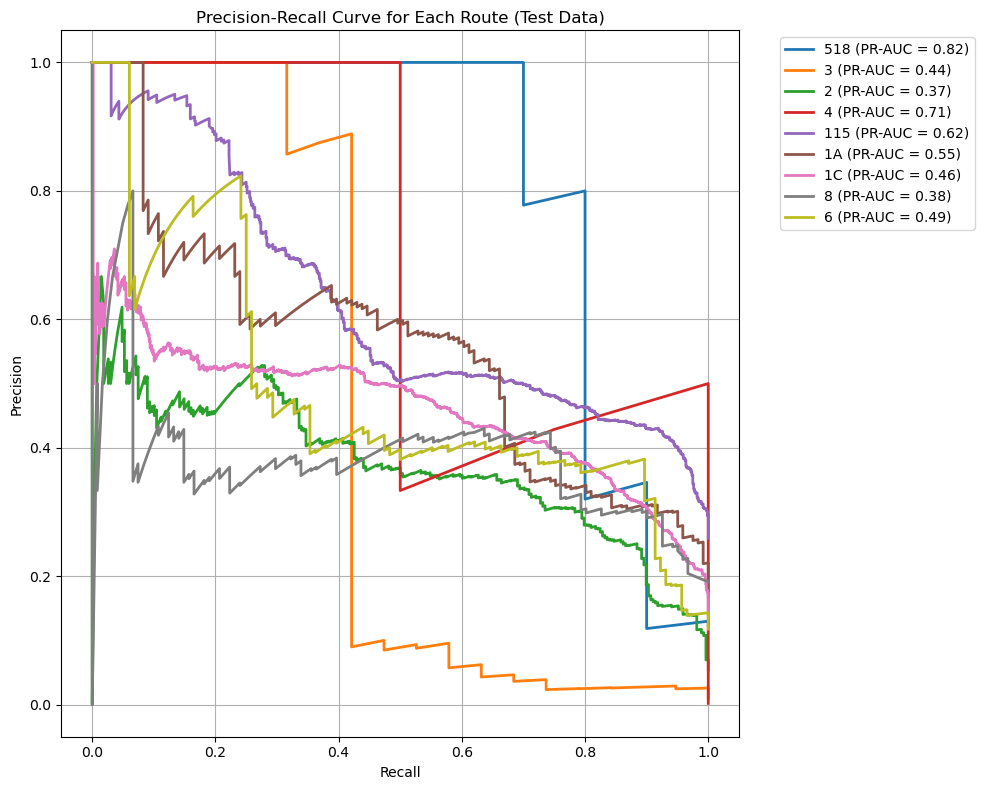

In [28]:
# Create a figure for the PR curves
plt.figure(figsize=(10, 8))

# Loop through each route and its corresponding model
for route, model in models.items():
    # Map the route value to its name
    route_name = route_mapping.get(round(route, 6), f'Unknown ({route})')

    # Get the test data for the route
    test_route = df[df['Route Name'] == route]
    X_test = test_route[feature_cols]
    y_test = test_route['Overcrowded']

    # Check if the positive class (1) exists in the test set
    if 1 not in y_test.unique():
        print(f"Skipping Route {route_name}: No positive class (1) in test set.")
        continue

    # Get predicted probabilities for the positive class (1)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

    # Compute PR-AUC
    pr_auc = auc(recall, precision)

    # Plot the PR curve for the route with its name
    plt.plot(recall, precision, lw=2, label=f'{route_name} (PR-AUC = {pr_auc:.2f})')

# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Route (Test Data)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Skipping Route TUNNEL: Not enough classes in test set.
Skipping Route 25: Not enough classes in test set.
Skipping Route 10: Not enough classes in test set.
Skipping Route 42: Not enough classes in test set.
Skipping Route 7: Not enough classes in test set.
Skipping Route 14: Not enough classes in test set.
Skipping Route 418: Not enough classes in test set.


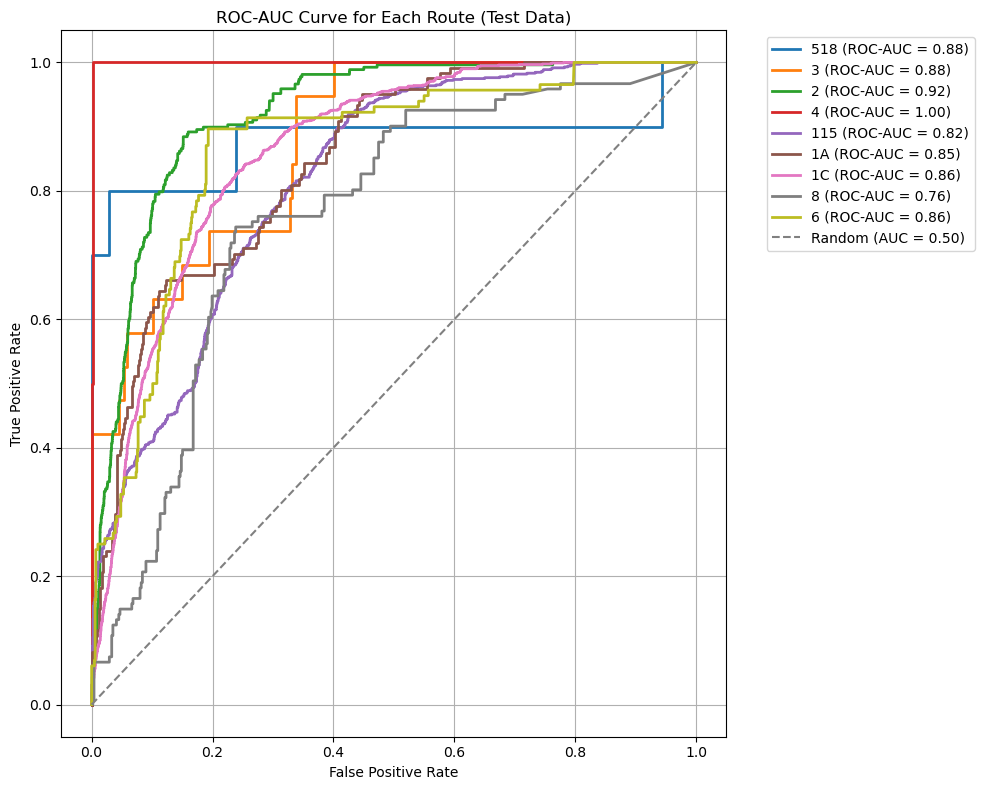

In [29]:
# Create a figure for the ROC curves
plt.figure(figsize=(10, 8))

# Loop through each route and its corresponding model
for route, model in models.items():
    # Map the route value to its name
    route_name = route_mapping.get(round(route, 6), f'Unknown ({route})')

    # Get the test data for the route
    test_route = df[df['Route Name'] == route]
    X_test = test_route[feature_cols]
    y_test = test_route['Overcrowded']

    # Check if both classes (0 and 1) exist in the test set
    if len(y_test.unique()) < 2:
        print(f"Skipping Route {route_name}: Not enough classes in test set.")
        continue

    # Get predicted probabilities for the positive class (1)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)

    # Compute ROC-AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the route with its name
    plt.plot(fpr, tpr, lw=2, label=f'{route_name} (ROC-AUC = {roc_auc:.2f})')

# Plot the random classifier line (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.50)')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Route (Test Data)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
